# The Hill function

In [ ]:
- wikipedia: Hill equation proper reflects the cellular or tissue response to the ligand: the physiological output of the system, such as muscle contraction.

The binding of a ligand to a macromolecule is often enhanced if there are already other ligands present on the same macromolecule (this is known as cooperative binding).

The Hill–Langmuir equation is useful for determining the degree of cooperativity of the ligand(s) binding to the enzyme or receptor. The Hill coefficient provides a way to quantify the degree of interaction between ligand binding sites.

## Hill function for activator

$$
p_{ij} = \frac{x^{n_{ij}}_j}{h^{n_{ij}}_{ij} + x^{n_{ij}}_{j}}
$$

## Hill function for repressor

$$
p_{ij} = 1- \frac{x^{n_{ij}}_j}{h^{n_{ij}}_{ij} + x^{n_{ij}}_{j}}
$$ 

In [ ]:
def hill_function(layer):
    indx = np.random.randint(0, timesteps)
    
    regulators = adjacency[:, layer] != 0
    repressors = adjacency[:, layer] < 0
    
    half_response = np.mean(concentration[indx, regulators], axis=0)
    
    nums = np.power(unspliced, coop_state)
    denoms = np.power(half_response, coop_state) + nums
    p = np.einsum("ijs,ijs->ijs", nums, 1 / denoms)
    
    p[repressors] = 1 - p[repressors]
    return p

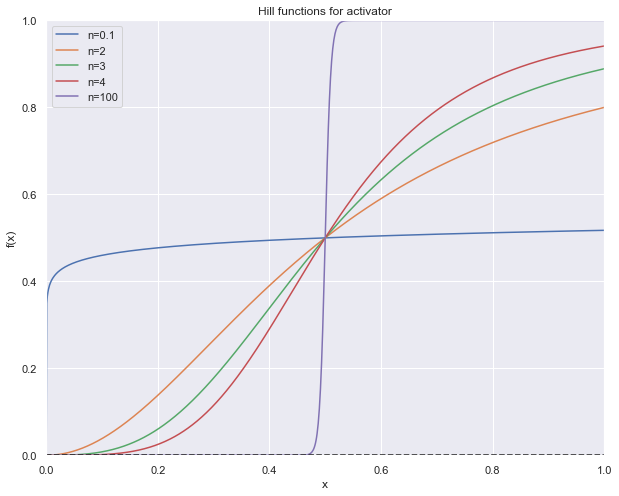

In [52]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def hill(A, n=2.0):
  A0=0.5
  p = A**n/(A0**n + A**n)
  return p

concentrations= np.linspace(0,1,1000) #1000 euqally-spaced values between 0 and 100



plt.figure(figsize=(10,8))

p=hill(concentrations, n=0.1)
plt.plot(concentrations, p, label='n=0.1')

p=hill(concentrations, n=2)
plt.plot(concentrations, p, label='n=2')

p=hill(concentrations, n=3)
plt.plot(concentrations, p, label='n=3')

p=hill(concentrations, n=4)
plt.plot(concentrations, p, label='n=4')

p=hill(concentrations, n=100)
plt.plot(concentrations, p, label='n=100')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline([0], color='black', linestyle='--')
plt.title('Hill functions for activator')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.show()

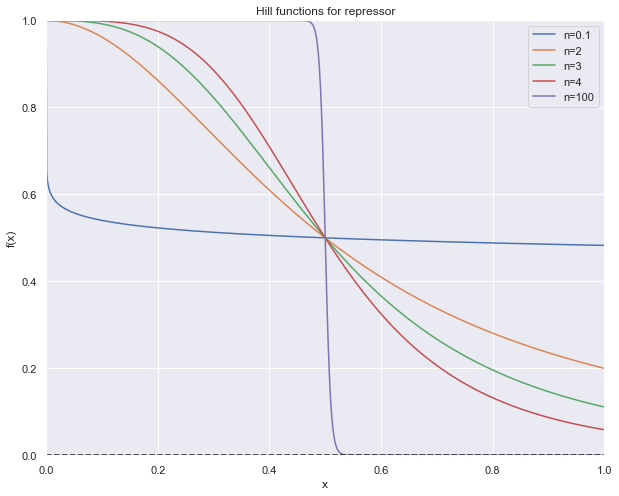

In [53]:
def hill(A, n=2.0):
  A0=0.5
  p = 1 - (A**n/(A0**n + A**n))
  return p

concentrations= np.linspace(0,1,1000) #1000 euqally-spaced values between 0 and 100


plt.figure(figsize=(10,8))

thetas=hill(concentrations, n=0.1)
plt.plot(concentrations, thetas, label='n=0.1')

thetas=hill(concentrations, n=2)
plt.plot(concentrations, thetas, label='n=2')

thetas=hill(concentrations, n=3)
plt.plot(concentrations, thetas, label='n=3')

thetas=hill(concentrations, n=4)
plt.plot(concentrations, thetas, label='n=4')

thetas=hill(concentrations, n=100)
plt.plot(concentrations, thetas, label='n=100')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline([0], color='black', linestyle='--')
plt.title('Hill functions for repressor')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.show()

# under differentiation state simulation
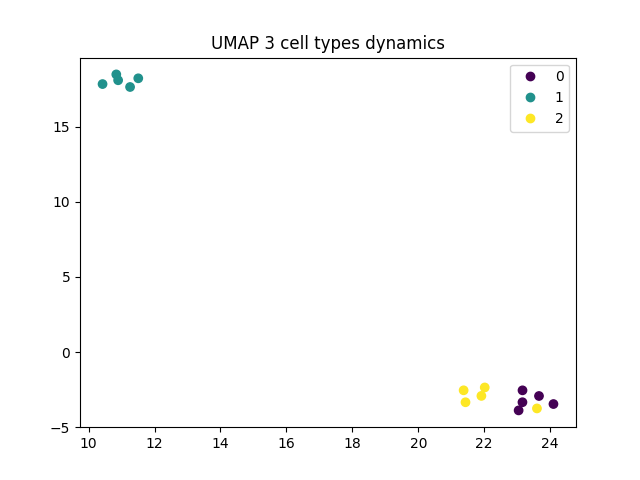 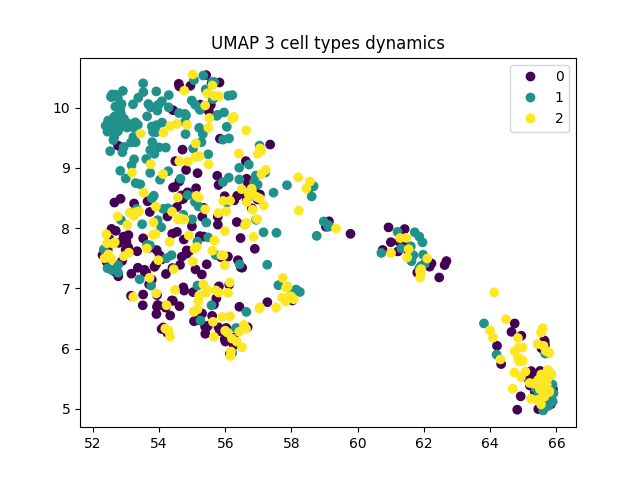

# under steady stae simulation
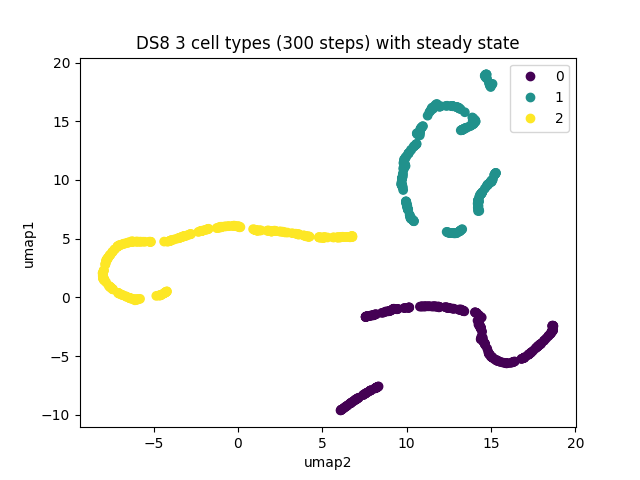 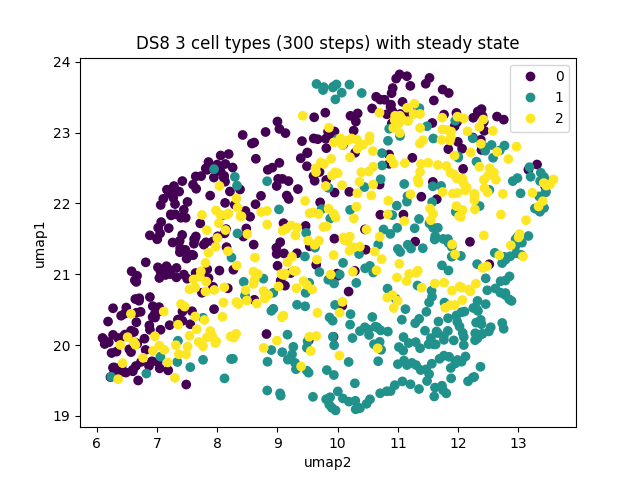 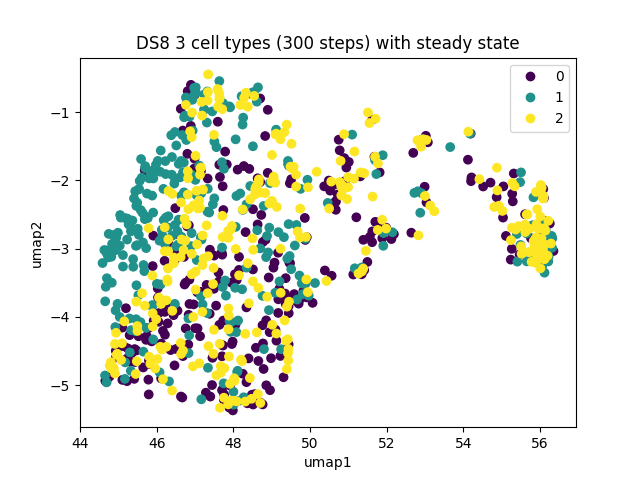